# Анализ рынка пассажирских авиаперевозок
## Skyscanner

##### Я выбрала 17 городов России, так как полёты во многие страны не регулярные.
##### Цель:
#####     Получить данные по ценам на перелёты в эти города за январь 2022 
#####     Проанализировать зависимость цен от дня недели, интервала времени полёта и авиакомпании

In [ ]:
!pip install fake_useragent
!pip install beautifulsoup4 
!pip install requests
!pip install selenium

In [1]:
from fake_useragent import UserAgent
from datetime import datetime, date, time
from bs4 import BeautifulSoup
import requests

from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
driver = webdriver.Chrome('/Users/reginakhabirova/Documents/HSE/chromedriver')
driver.get('https://www.skyscanner.ru/transport/flights/mosc/kzn/20220114')

html = driver.page_source
soup = BeautifulSoup(html)

/Applications/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


# New part

#### for test

In [201]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome('/Users/reginakhabirova/Documents/HSE/chromedriver')
url = 'https://www.skyscanner.ru/transport/flights/mosc/kzn/20220114'
driver.get(url)
sleep(2)
html = driver.page_source
soup = BeautifulSoup(html)

/Applications/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


###### Города, которые буду исследовать

In [2]:
cities = {'Казань': 'kzn',
            'Санкт-Петербург': 'led',
            'Сочи': 'aer',
            'Владивосток': 'vvo',
            'Нижний Новгород': 'goj',
            'Калиниград': 'kgd',
            'Минеральные воды': 'mrv',
            'Екатеринбург': 'svx',
            'Новосибирск': 'ovb',
            'Челябинск': 'cek',
            'Омск': 'oms',
            'Самара': 'kuf',
            'Уфа': 'ufa',
            'Ростов-на-Дону': 'rov',
            'Пермь': 'pee',
            'Воронеж': 'voz',
            'Волгоград': 'vog'}

###### Даты

In [3]:
dates = []
for day in range(31):
    if day<9:
        dates.append('202201'+'0'+str(day+1))
    else:
        dates.append('202201'+str(day+1))

In [4]:
main_url = 'https://www.skyscanner.ru/transport/flights/mosc'

In [311]:
url = 'https://www.skyscanner.ru/transport/flights/mosc/vvo/20220102'

##### Функция, которая по ссылке url  получает нужные атрибуты

In [5]:
def get_data (url):
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("--no-sandbox")
    driver = webdriver.Chrome('/Users/reginakhabirova/Documents/HSE/chromedriver')
    driver.get(url)
    sleep(10)
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml")
    #tickets = {}
    count = 1
    for i in soup.find_all('div', class_ = 'FlightsTicket_container__NWJkY'):
        try:
            temp = {}
            temp['company_name'] = i.find('div', class_ = 'LegLogo_legImage__MmY0Z').find('img')['alt']
            times = i.find_all('span', class_ = 'BpkText_bpk-text__YWQwM BpkText_bpk-text--xl__MmE4Y')
            time_s = times[0].text
            time_f = times[1].text
            temp['time_departure'] = time_s
            temp['time_arrival'] = time_f
            aeroports = i.find_all('span', class_ = 'LegInfo_routePartialCityTooltip__NTE4Z')
            temp['city_departure'] = aeroports[0].text
            temp['city_arrival'] = aeroports[1].text
            flight_type = i.find('span', class_ = 'LegInfo_stopsLabelGreen__YWM4M').text
            temp['flight_type'] = flight_type
            price = str(i.find('span', class_ = 'BpkText_bpk-text--bold__YmVjN').text).replace('"\"xa', '')
            x = ''.join(re.findall('[0-9]+',price))
            temp['price'] = x
            temp['date'] = url[-8:]
            tickets[count] = temp
            count += 1
        except:
            pass
        #df = pd.DataFrame.from_dict(tickets, orient = 'index')
    #for key, value in tickets.items():
    #    print(key, value)
    return tickets

In [6]:
tickets = {}
count = 1

In [ ]:
# очень долго провозилась с парсером, поэтому пока загрузила только 15 дней
# к следующему дедлайну, загружу бОльший период времени

In [7]:
all_url = []
for city in list(cities.values()):
    for day in dates[:15]:
        all_url.append(main_url+'/'+city+'/'+day)
len(all_url)    

255

In [13]:
for url in all_url:
    res = get_data(url)
    df = pd.DataFrame.from_dict(res, orient = 'index')
    df_total = pd.concat([df_total, df])
    df_total.to_csv('/Users/reginakhabirova/Documents/HSE/skyscanner', sep='\t')
    print(url) # печатаю, чтобы понять, что отработало

https://www.skyscanner.ru/transport/flights/mosc/kzn/20220101
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220102
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220103
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220104
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220105
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220106
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220107
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220108
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220109
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220110
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220111
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220112
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220113
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220114
https://www.skyscanner.ru/transport/flights/mosc/kzn/20220115
https://www.skyscanner.ru/transport/flights/mosc/led/20220101
https://

https://www.skyscanner.ru/transport/flights/mosc/ovb/20220114
https://www.skyscanner.ru/transport/flights/mosc/ovb/20220115
https://www.skyscanner.ru/transport/flights/mosc/cek/20220101
https://www.skyscanner.ru/transport/flights/mosc/cek/20220102
https://www.skyscanner.ru/transport/flights/mosc/cek/20220103
https://www.skyscanner.ru/transport/flights/mosc/cek/20220104
https://www.skyscanner.ru/transport/flights/mosc/cek/20220105
https://www.skyscanner.ru/transport/flights/mosc/cek/20220106
https://www.skyscanner.ru/transport/flights/mosc/cek/20220107
https://www.skyscanner.ru/transport/flights/mosc/cek/20220108
https://www.skyscanner.ru/transport/flights/mosc/cek/20220109
https://www.skyscanner.ru/transport/flights/mosc/cek/20220110
https://www.skyscanner.ru/transport/flights/mosc/cek/20220111
https://www.skyscanner.ru/transport/flights/mosc/cek/20220112
https://www.skyscanner.ru/transport/flights/mosc/cek/20220113
https://www.skyscanner.ru/transport/flights/mosc/cek/20220114
https://

In [15]:
df_total

,company_name,time_departure,time_arrival,city_departure,city_arrival,flight_type,price,date
1,Pobeda,08:35,10:10,VKO,KZN,Прямой,2249,NaN
2,Pobeda,19:45,21:20,VKO,KZN,Прямой,2249,NaN
3,S7 Airlines,08:00,09:35,DME,KZN,Прямой,4548,NaN
4,S7 Airlines,17:50,19:25,DME,KZN,Прямой,4548,NaN
5,S7 Airlines,14:40,16:15,DME,KZN,Прямой,4548,NaN
...,...,...,...,...,...,...,...,...
5,S7 Airlines,17:20,19:10,DME,VOG,Прямой,5662,20220109
6,Aeroflot,02:40,04:35,SVO,VOG,Прямой,6518,20220109
7,Aeroflot,14:30,16:25,SVO,VOG,Прямой,6712,20220109
8,S7 Airlines,07:50,12:00,DME,UFA,Прямой,4294,20220108


In [423]:
df_total.to_csv('/Users/reginakhabirova/Documents/HSE/skyscanner', sep='\t')

### Минимальный анализ данных

In [335]:
df_total.columns

Index(['company_name', 'time_departure', 'time_arrival', 'city_departure',
       'city_arrival', 'flight_type', 'price', 'date'],
      dtype='object')

###### новые столбцы

In [375]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 9
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_name       99 non-null     object        
 1   time_departure     99 non-null     object        
 2   time_arrival       99 non-null     object        
 3   city_departure     99 non-null     object        
 4   city_arrival       99 non-null     object        
 5   flight_type        99 non-null     object        
 6   price              99 non-null     float64       
 7   date               99 non-null     object        
 8   date_dt            99 non-null     datetime64[ns]
 9   time_departure_dt  99 non-null     object        
 10  time_arrival_dt    99 non-null     object        
 11  day_name           99 non-null     object        
 12  is_weekend         99 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage:

In [16]:
df_total['price'] = [float(pr) for pr in df_total['price']]

In [17]:
df_total['date_dt'] = pd.to_datetime(df_total['date'], format='%Y%m%d')

In [18]:
df_total['time_departure_dt'] = pd.to_datetime(df_total['time_departure'],format= '%H:%M' ).dt.time
df_total['time_arrival_dt'] = pd.to_datetime(df_total['time_arrival'],format= '%H:%M' ).dt.time

In [19]:
df_total['day_name'] = [day.day_name() for day in df_total['date_dt']]

In [20]:
df_total['is_weekend'] = np.where((df_total['day_name']=='Sunday')|(df_total['day_name']=='Saturday'), 1, 0)

In [21]:
df_total.head()

,company_name,time_departure,time_arrival,city_departure,city_arrival,flight_type,price,date,date_dt,time_departure_dt,time_arrival_dt,day_name,is_weekend
1,Pobeda,08:35,10:10,VKO,KZN,Прямой,2249.0,NaN,NaT,08:35:00,10:10:00,NaN,0
2,Pobeda,19:45,21:20,VKO,KZN,Прямой,2249.0,NaN,NaT,19:45:00,21:20:00,NaN,0
3,S7 Airlines,08:00,09:35,DME,KZN,Прямой,4548.0,NaN,NaT,08:00:00,09:35:00,NaN,0
4,S7 Airlines,17:50,19:25,DME,KZN,Прямой,4548.0,NaN,NaT,17:50:00,19:25:00,NaN,0
5,S7 Airlines,14:40,16:15,DME,KZN,Прямой,4548.0,NaN,NaT,14:40:00,16:15:00,NaN,0


In [27]:
df_reserve = df_total.copy()

##### delete na

In [30]:
df = df_total.dropna()

##### stat

In [35]:
df.describe()

,price,is_weekend
count,2453.000000,2453.000000
mean,5159.558907,0.305748
std,2749.548998,0.460817
min,1499.000000,0.000000
25%,3549.000000,0.000000
50%,4560.000000,0.000000
75%,5785.000000,1.000000
max,16250.000000,1.000000


In [36]:
df.describe(include=['object', 'bool'])

,company_name,time_departure,time_arrival,city_departure,city_arrival,flight_type,date,time_departure_dt,time_arrival_dt,day_name
count,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453
unique,16,160,165,3,17,1,15,160,165,7
top,Aeroflot,18:05,19:45,SVO,KZN,Прямой,20220113,18:05:00,19:45:00,Saturday
freq,770,107,135,1023,411,2453,292,107,135,526


In [37]:
df.groupby(['company_name'])['price'].agg([np.mean, np.std, np.min, np.max])

,mean,std,amin,amax
company_name,,,,
Aeroflot,7006.425974,3523.340895,2837.0,16250.0
Alrosa Mirny Air Enterprise,5248.200000,2105.338706,2170.0,7070.0
Azimuth,5791.612903,707.517240,2740.0,7480.0
Azur Air,4513.800000,2185.742139,1840.0,6103.0
IrAero,8160.000000,NaN,8160.0,8160.0
NordStar,2780.157895,1566.867223,1815.0,8304.0
Nordwind Airlines,4466.177778,2260.528429,1708.0,11990.0
Pobeda,3635.689769,1438.270497,1499.0,8599.0
Red Wings,4848.093750,1560.319123,1898.0,7825.0


In [ ]:
# средняя цена ожидаемо выше у Аэрофлота, IrAero в расчёт не беру, тк всего одно наблюдение
# самые низкие цены у NordStar

In [38]:
pd.crosstab(df['company_name'], df['city_arrival'])

city_arrival,AER,CEK,GOJ,KGD,KUF,KZN,LED,MRV,OMS,OVB,PEE,ROV,SVX,UFA,VOG,VOZ,VVO
company_name,,,,,,,,,,,,,,,,,
Aeroflot,0,90,44,0,15,216,49,1,54,18,32,14,24,82,32,18,81
Alrosa Mirny Air Enterprise,1,0,0,0,0,0,1,2,0,6,0,0,0,0,0,0,0
Azimuth,1,0,0,0,0,0,0,2,0,0,0,28,0,0,0,0,0
Azur Air,1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0
IrAero,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
NordStar,27,0,0,0,0,0,2,9,0,0,0,0,0,0,0,0,0
Nordwind Airlines,8,8,0,0,0,2,22,2,11,0,13,14,4,3,0,0,3
Pobeda,74,17,0,51,0,70,50,58,38,14,58,0,48,83,45,0,0
Red Wings,2,0,0,12,0,0,0,4,0,0,0,14,0,0,0,0,0


In [ ]:
Здесь вижу, что по ряду направлений крайне мало полётов
Лидеры по количеству рейсов - Аэрофлот, Победа, S7Airlines
Есть авиакомпании, по которым рейсы только по одному направлению и их крайне мало - IrAero, Yamal, AzurAir

#### Цены в разбивке по компаниям и типу дней (выходные или нет) для каждого города

In [60]:
price_by_company = pd.pivot_table(df,index=['city_arrival','company_name'],aggfunc={'price':np.mean})
price_by_company

price
city_arrival company_name                             
AER          Alrosa Mirny Air Enterprise   2456.000000
             Azimuth                       7480.000000
             Azur Air                      1840.000000
             NordStar                      2226.555556
             Nordwind Airlines             2236.000000
...                                                ...
VOZ          RusLine                       3325.000000
             S7 Airlines                   3554.000000
             UTair                         4358.000000
VVO          Aeroflot                     16129.629630
             Nordwind Airlines            11990.000000

[99 rows x 1 columns]

In [68]:
price_by_company.reset_index(inplace=True)

In [92]:
price_by_company['city_arrival'].unique()

array(['AER', 'CEK', 'GOJ', 'KGD', 'KUF', 'KZN', 'LED', 'MRV', 'OMS',
       'OVB', 'PEE', 'ROV', 'SVX', 'UFA', 'VOG', 'VOZ', 'VVO'],
      dtype=object)

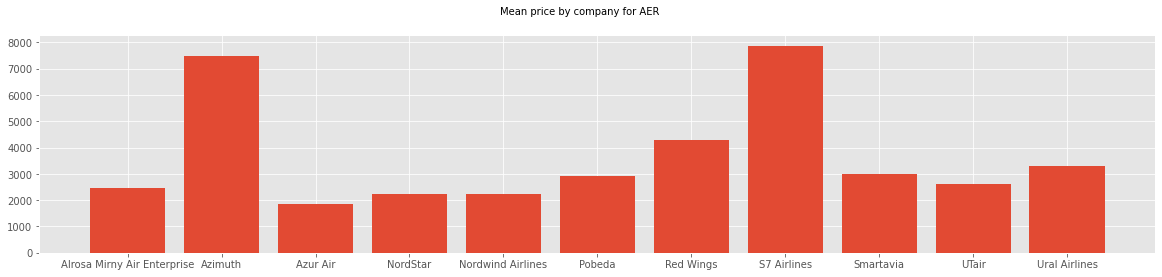

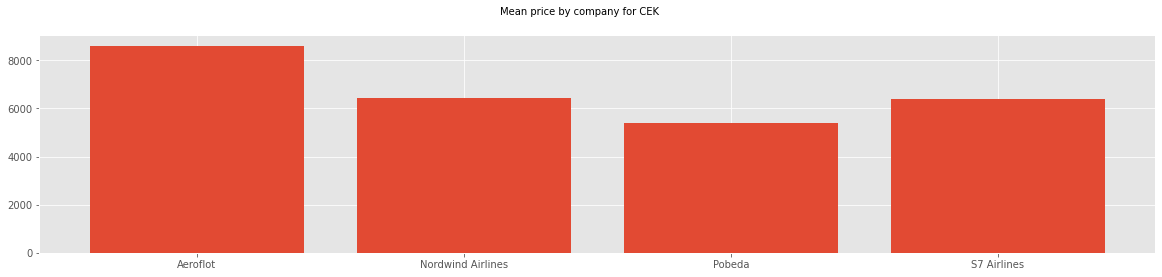

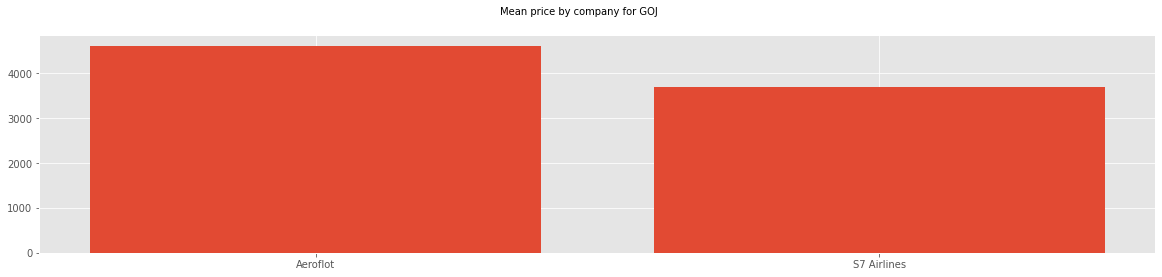

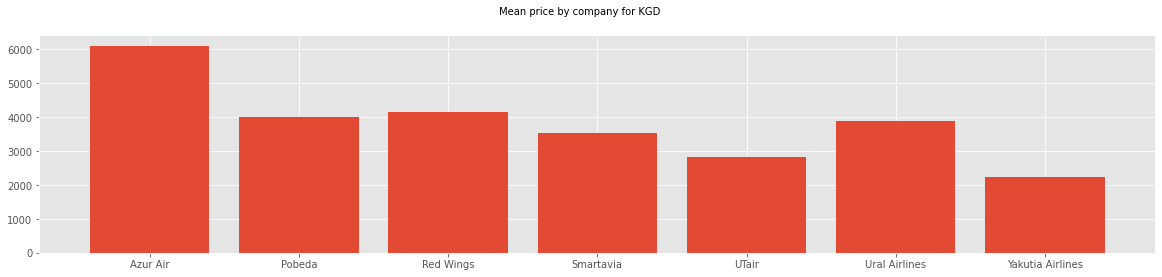

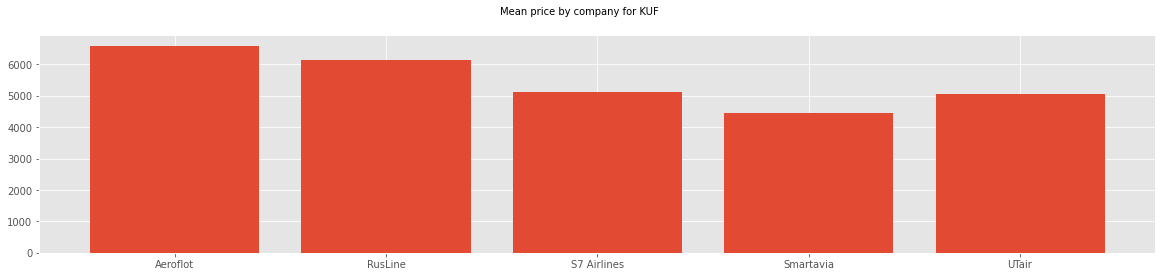

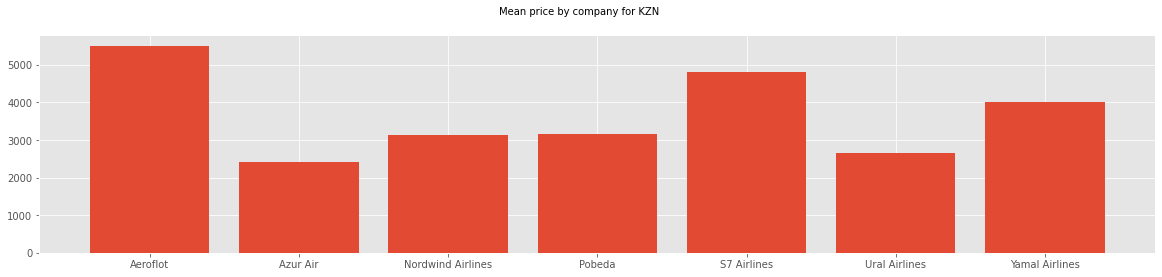

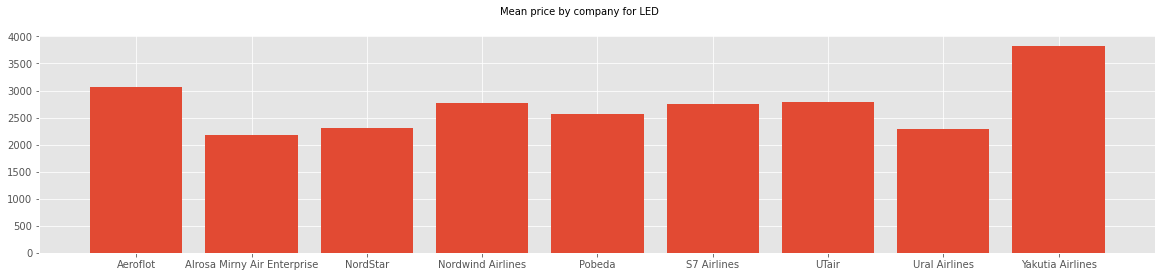

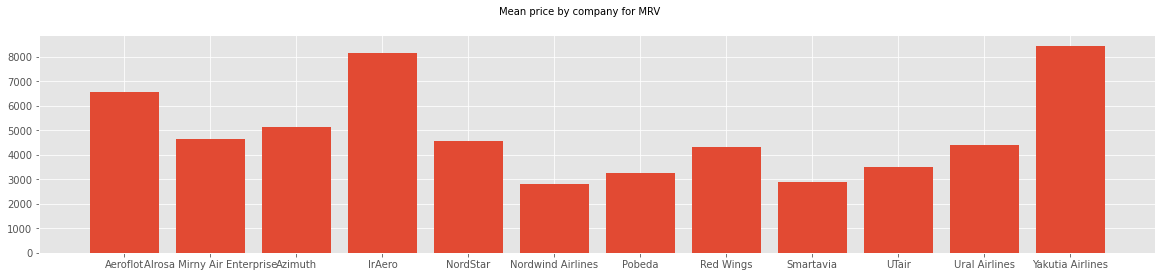

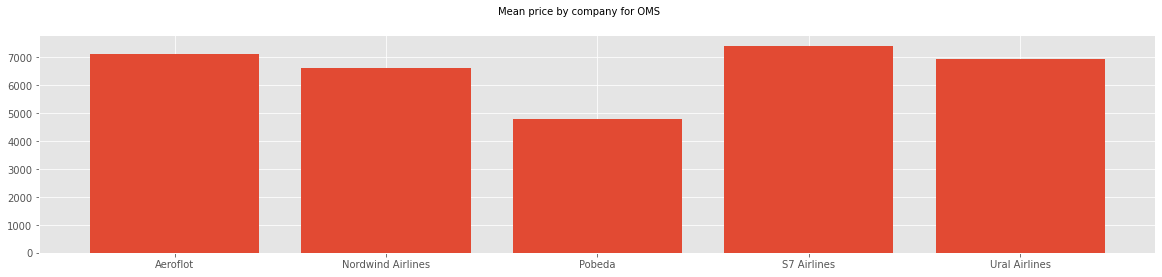

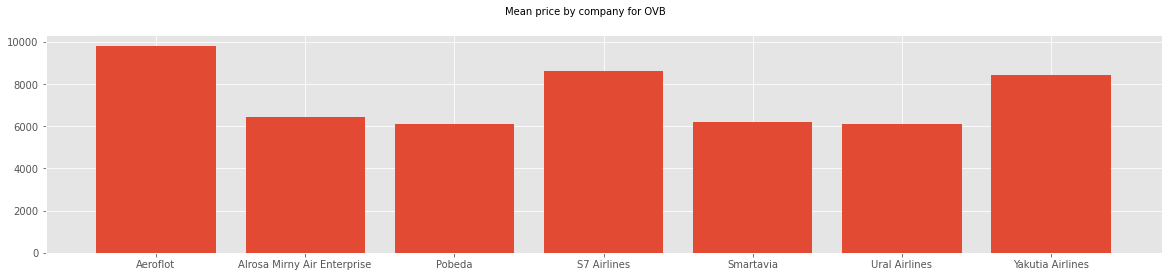

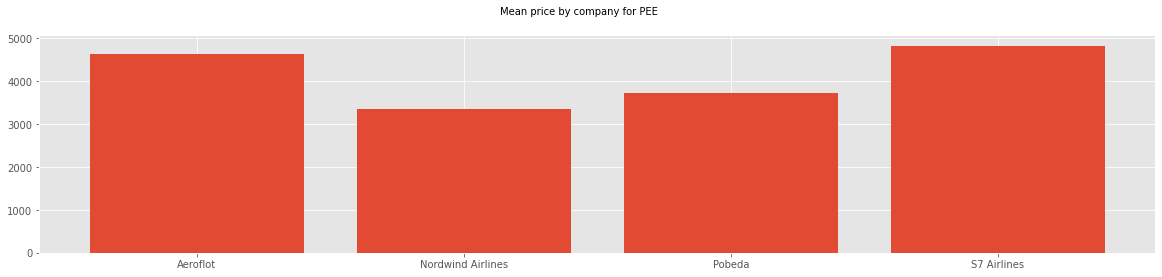

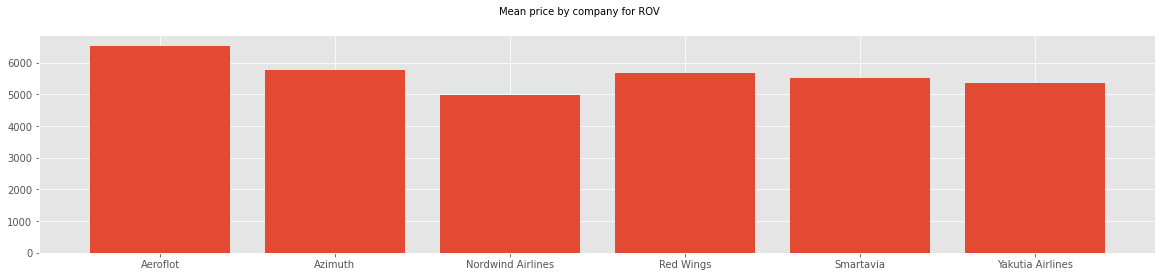

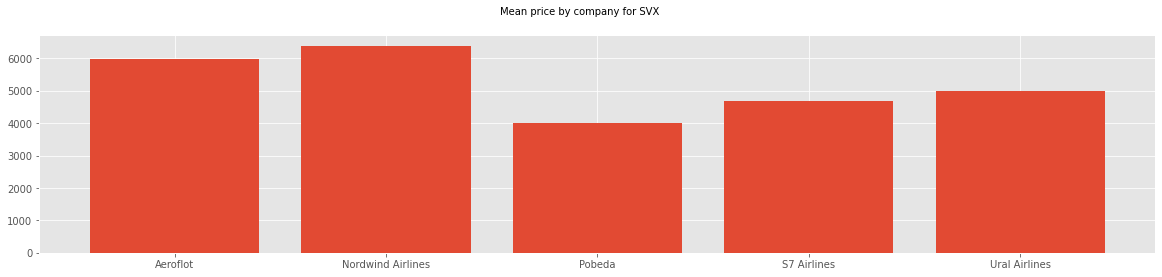

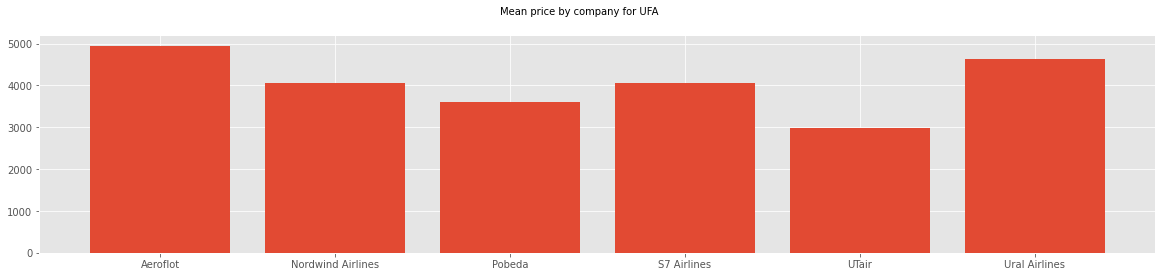

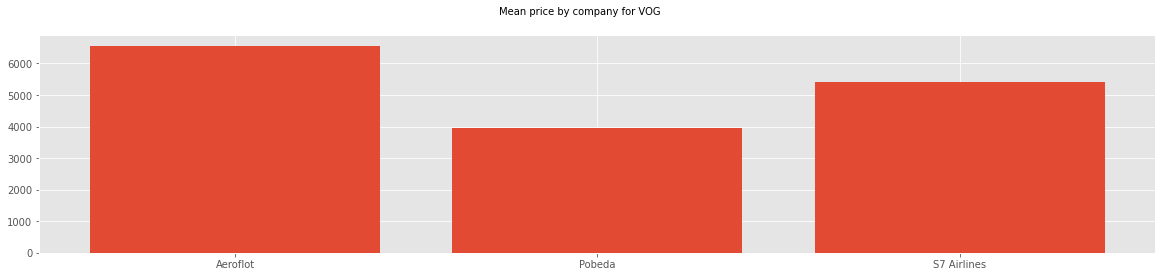

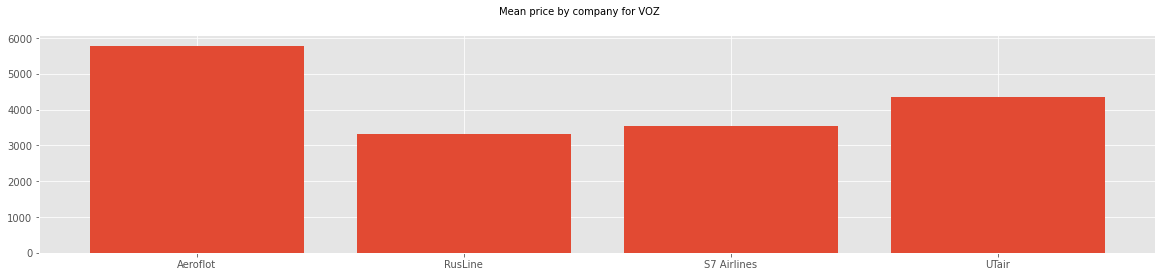

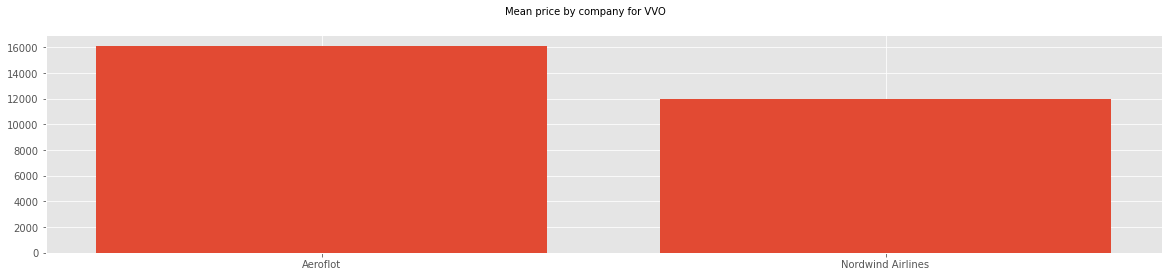

In [104]:
for airport in price_by_company['city_arrival'].unique():
    x = price_by_company[price_by_company['city_arrival']==airport]['company_name']
    y = price_by_company[price_by_company['city_arrival']==airport]['price']
    fig = plt.figure(figsize=(20, 4))
    plt.bar(x, y)
    fig.suptitle('Mean price by company for '+airport, fontsize=10)
    plt.show()

In [ ]:
Для большинства городов назначения Аэрофлот даёт самые дорогие билеты, так же в ряде случаев выделяется S7 и YakutiaAirlines

<Figure size 1440x576 with 0 Axes>

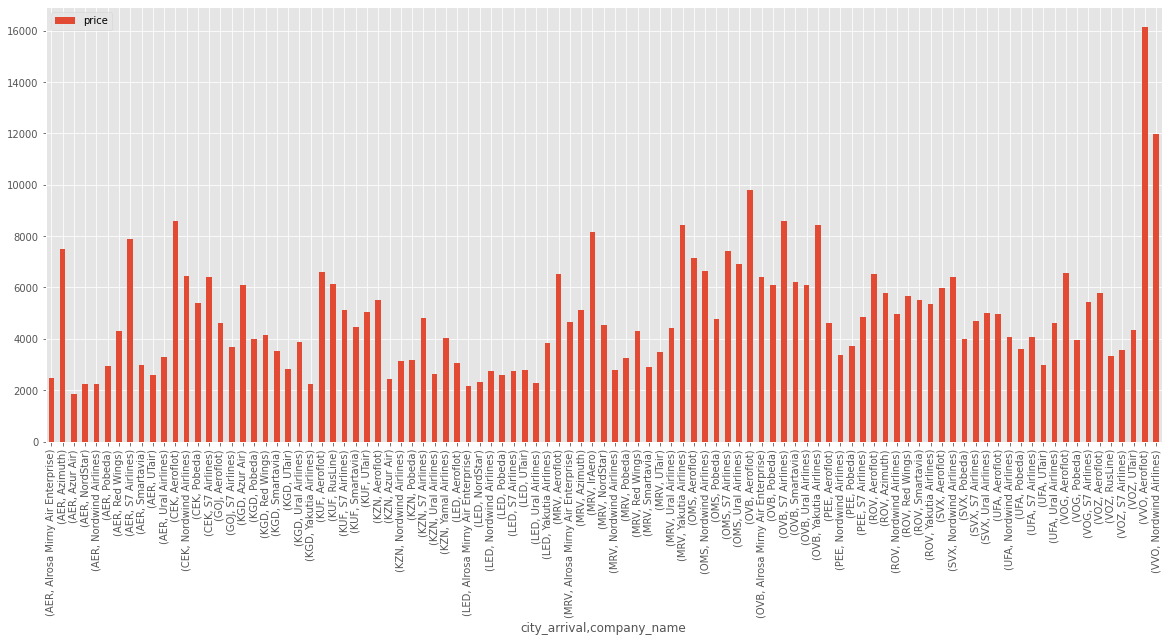

In [63]:
plt.figure(figsize=(20, 8))
price_by_company.plot(kind='bar', figsize=(20, 8))
plt.show()

In [ ]:
Самые дорогие цены во Владивосток, что ожидаемо из-за расстояния

In [105]:
price_by_weekend = pd.pivot_table(df,index=['city_arrival','is_weekend'],aggfunc={'price':np.mean})
price_by_weekend.reset_index(inplace=True)

In [108]:
price_by_weekend.head()

,city_arrival,is_weekend,price
0,AER,0,2467.850000
1,AER,1,4415.964286
2,CEK,0,7860.500000
3,CEK,1,7182.435897
4,GOJ,0,3930.800000


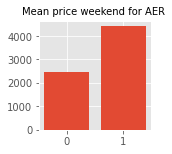

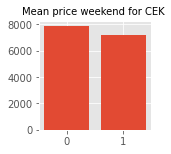

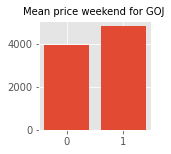

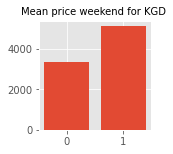

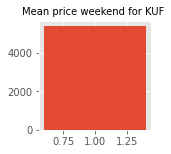

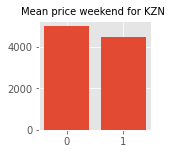

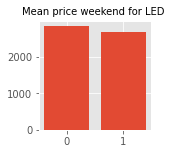

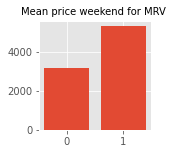

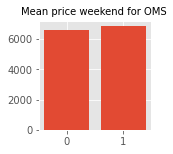

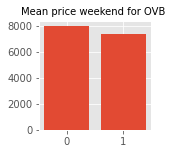

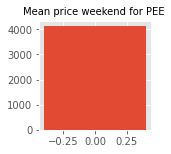

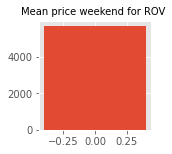

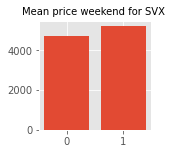

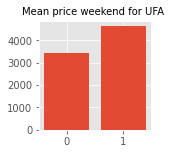

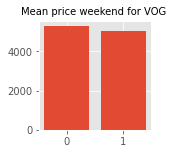

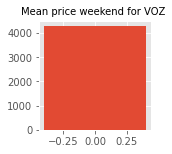

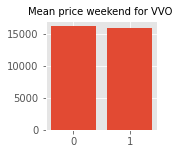

In [113]:
for airport in price_by_weekend['city_arrival'].unique():
    x = price_by_weekend[price_by_weekend['city_arrival']==airport]['is_weekend']
    y = price_by_weekend[price_by_weekend['city_arrival']==airport]['price']
    fig = plt.figure(figsize=(2, 2))
    plt.bar(x, y)
    fig.suptitle('Mean price weekend for '+airport, fontsize=10)
    plt.show()

In [ ]:
По ряду направлений рейсы только в будни - Воронеж, Ростов-на-Дону, а в Самару, наоборот, только в выходные. 
Думаю, про бОльшем количестве данных, эта особенность уйдёт
В большинстве случаев билеты на выходных стоят дороже, исключения Волгоград, Казань, Новосибирск
Думаю, что здесь не малую роль играет то, что даты полётов в основном во время новогодних каникул, так же нужно больше данных

In [ ]:
for airport in price_by_company['city_arrival'].unique():
    x = price_by_company[price_by_company['city_arrival']==airport]['company_name']
    y = price_by_company[price_by_company['city_arrival']==airport]['price']
    fig = plt.figure(figsize=(20, 4))
    plt.bar(x, y)
    fig.suptitle('Mean price by company for '+airport, fontsize=10)
    plt.show()

In [120]:
for_heatmap = pd.pivot_table(df,values='price', 
                             index=['is_weekend'],columns=['company_name'],aggfunc=np.mean)

In [122]:
for_heatmap = round(for_heatmap/1000,2)

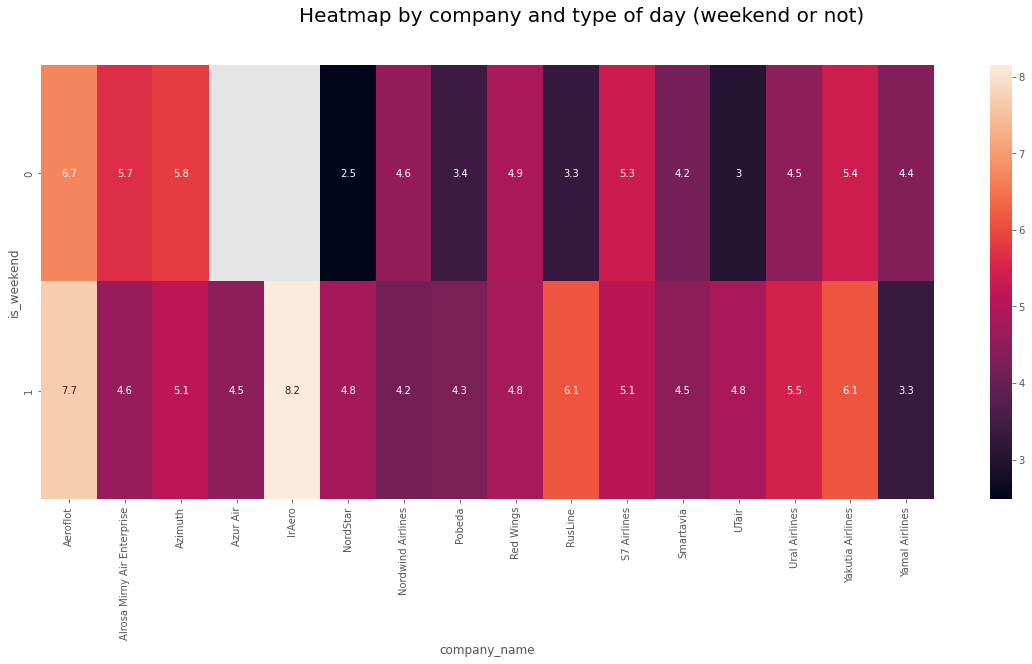

In [126]:
fig = plt.figure(figsize=(20, 8))
ax = sns.heatmap(for_heatmap, annot = True)
fig.suptitle('Heatmap by company and type of day (weekend or not)', fontsize=20)
plt.show()

In [ ]:
Внутри авиакомпаний так же вижу, что цены на выходных выше, за некоторыми исключениями

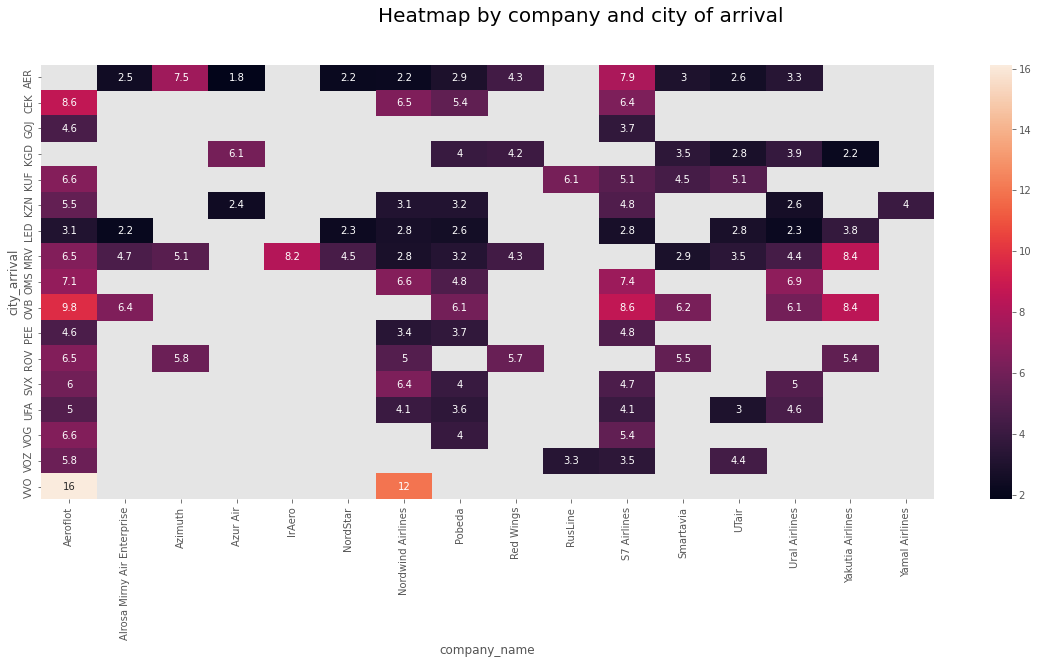

In [127]:
for_heatmap_city = pd.pivot_table(df,values='price', 
                             index=['city_arrival'],columns=['company_name'],aggfunc=np.mean)
for_heatmap_city = round(for_heatmap_city/1000,2)

fig = plt.figure(figsize=(20, 8))
ax = sns.heatmap(for_heatmap_city, annot = True)
fig.suptitle('Heatmap by company and city of arrival', fontsize=20)
plt.show()

In [ ]:
Кажется, что такой график не очень показателен, так как по Владивостоку, например, цена сильно выбивается, что очевидно
Нужно ли для него делать нормирование?

##### Hist by price

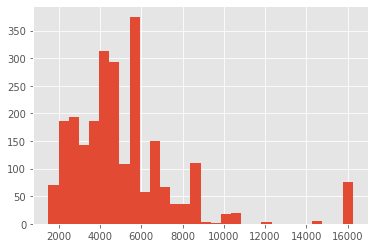

In [128]:
plt.hist(df['price'], bins = 30)
plt.show()

In [ ]:
Кажется, что без нормирования так же мало информативно, так как есть заведомо дорогие направления

<Figure size 720x288 with 0 Axes>

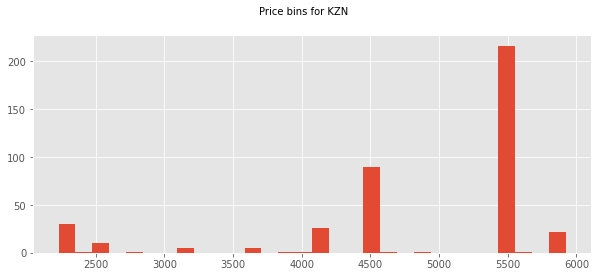

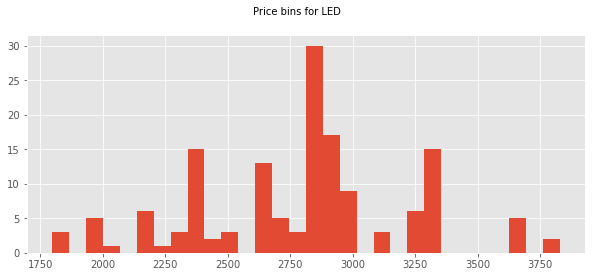

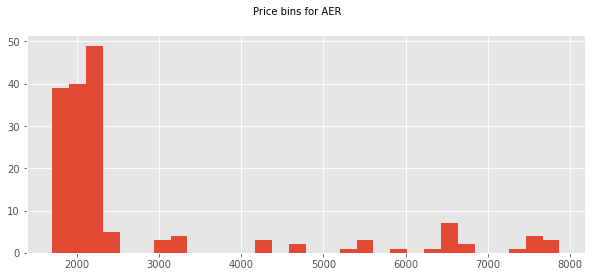

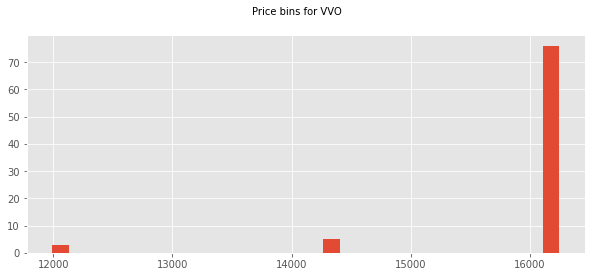

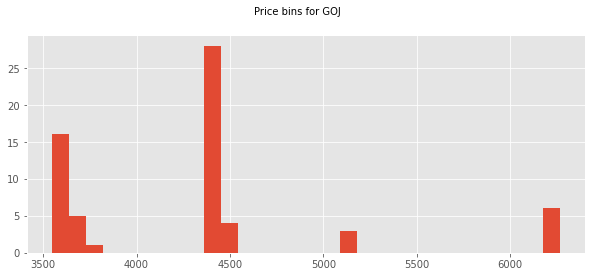

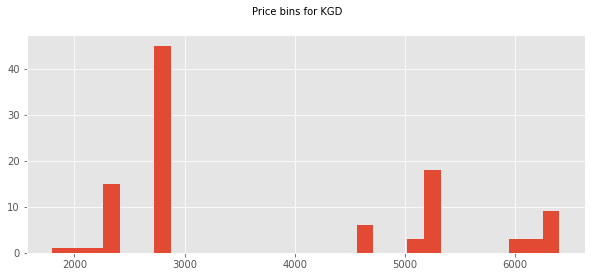

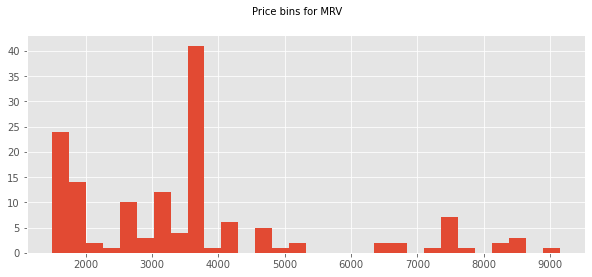

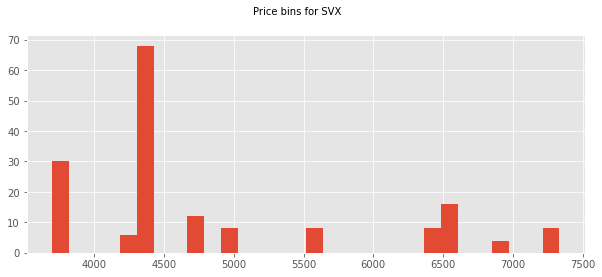

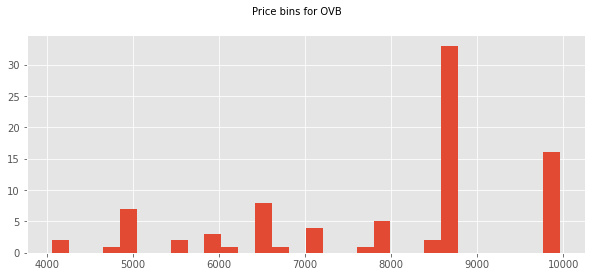

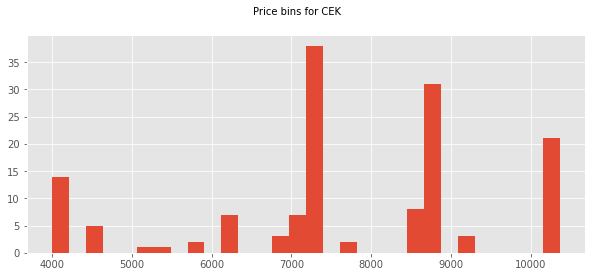

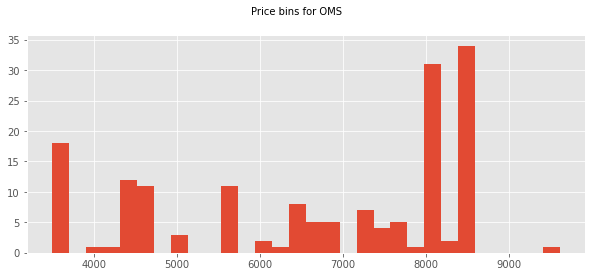

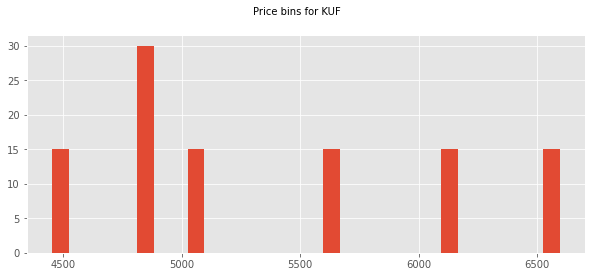

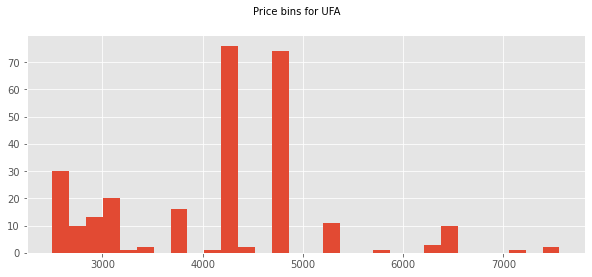

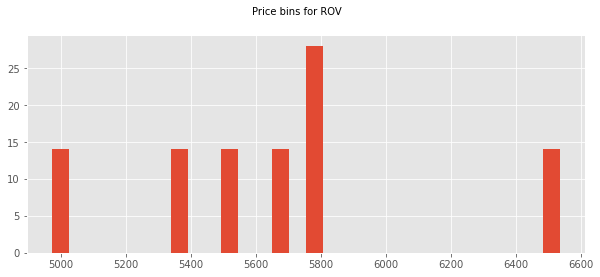

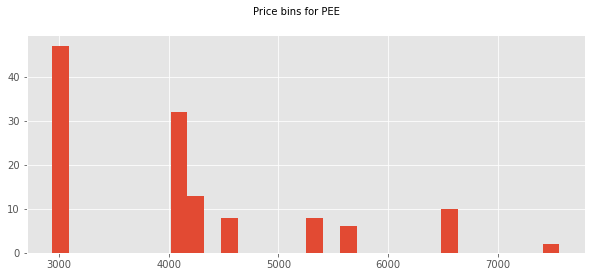

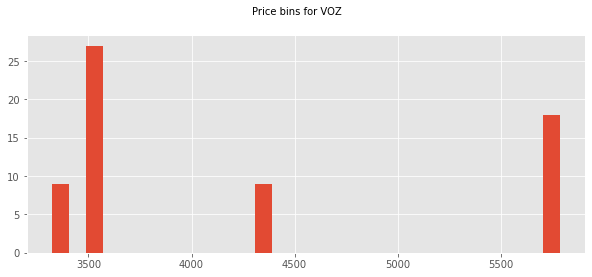

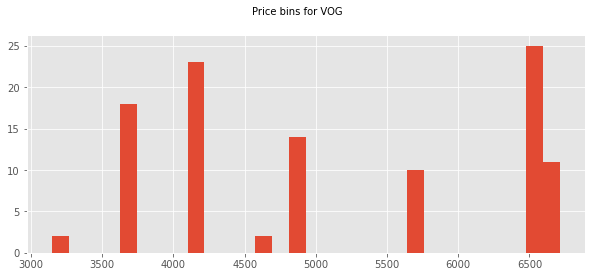

In [130]:
for airport in df['city_arrival'].unique():
    fig = plt.figure(figsize=(10, 4))
    plt.hist(df[df['city_arrival']==airport]['price'], bins = 30)
    fig.suptitle('Price bins for '+airport, fontsize=10)
    plt.show()

In [ ]:
По каждому городу выделяется бакет-лидер по цене, редко два (Омск, Уфа, Сочи)

In [ ]:
df.to_csv('/Users/reginakhabirova/Documents/HSE/skyscanner_final.csv', sep='\t')